### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
pd.options.mode.chained_assignment = None  # default='warn'

In [34]:
# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Merging all months data into one

In [3]:
files = [ file for file in os.listdir('./Sales_Data')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_data = pd.concat([all_data , df])
    

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Quick Statistics

In [4]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### Cleaning the data

#### locating the Rows with NaN Values and Removing them

In [5]:
#Boolean Representation for Value
#True where NaN presesnt
all_data.isna()
all_data


#Dispalying the rows thath have NaN Values
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Dropping NaN Values
all_data = all_data.dropna()
all_data

#Re-Set Index After Droping
all_data.reset_index()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186300,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### checking duplicates

In [7]:
all_data.duplicated()


0        False
2        False
3        False
4        False
5        False
         ...  
11681    False
11682    False
11683    False
11684    False
11685    False
Length: 186305, dtype: bool

#### Checking dtypes

In [9]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Adding new columns required for our  analysis

#### Month Column

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data

#Looks like there are some rows in all_data['Month'] with 'or'
#Locating and Removing 'Or'
all_data = all_data.loc[~all_data['Month'].str.contains('Or')]


#Converting Month Column From str to int32
all_data['Month'] = all_data['Month'].astype('int32')                       

In [11]:
#Reordering the Month column
cols = list(all_data.columns.values)

all_data = all_data[cols[0:5] + [cols[-1]] + [cols[-2]]]

#### Converting 'Quantity Ordered' Column into int type, 'Price Each' to float type and 'Order Date' into datetime

In [13]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32') 
all_data['Price Each'] = all_data['Price Each'].astype('float32')
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

####  Sales Column

In [14]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",99.989998
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",600.000000
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",11.990000
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",11.990000


In [15]:
#Reordering the Sales column
cols = list(all_data.columns.values)

all_data = all_data[cols[0:4] + [cols[-1]] + cols[4:7]]
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.950000,23.900000,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.989998,99.989998,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.000000,600.000000,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001"


#### Date, time hr and time min column

In [16]:
#creating a nw column of date
all_data['Date'] = all_data['Order Date'].dt.date

#creating a nw column of time hr
all_data['Time hr'] = all_data['Order Date'].dt.hour

#creating a nw column of time min
all_data['Time min'] = all_data['Order Date'].dt.minute


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,Date,Time hr,Time min
0,176558,USB-C Charging Cable,2,11.950000,23.900000,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",2019-04-19,8,46
2,176559,Bose SoundSport Headphones,1,99.989998,99.989998,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",2019-04-07,22,30
3,176560,Google Phone,1,600.000000,600.000000,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14,38
4,176560,Wired Headphones,1,11.990000,11.990000,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14,38
5,176561,Wired Headphones,1,11.990000,11.990000,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",2019-04-30,9,27


#### City Column

In [17]:
def getcity(address):
    return address.split(',')[1]

def getstate(address):
    return address.split(',')[2].split(' ')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{getcity(x)}  ({getstate(x)})")
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,Date,Time hr,Time min,City
0,176558,USB-C Charging Cable,2,11.950000,23.900000,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",2019-04-19,8,46,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.989998,99.989998,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",2019-04-07,22,30,Boston (MA)
3,176560,Google Phone,1,600.000000,600.000000,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,14,38,Los Angeles (CA)


## EDA

### Correlations

In [31]:
corr = all_data[['Quantity Ordered' , 'Price Each' ,'Sales' , 'Month' , 'Time hr']].corr()
corr

,Quantity Ordered,Price Each,Sales,Month,Time hr
Quantity Ordered,1.000000,-0.148272,-0.139417,0.000791,-0.002218
Price Each,-0.148272,1.000000,0.999203,-0.003375,0.001721
Sales,-0.139417,0.999203,1.000000,-0.003466,0.001668
Month,0.000791,-0.003375,-0.003466,1.000000,0.001731
Time hr,-0.002218,0.001721,0.001668,0.001731,1.000000


<AxesSubplot:>

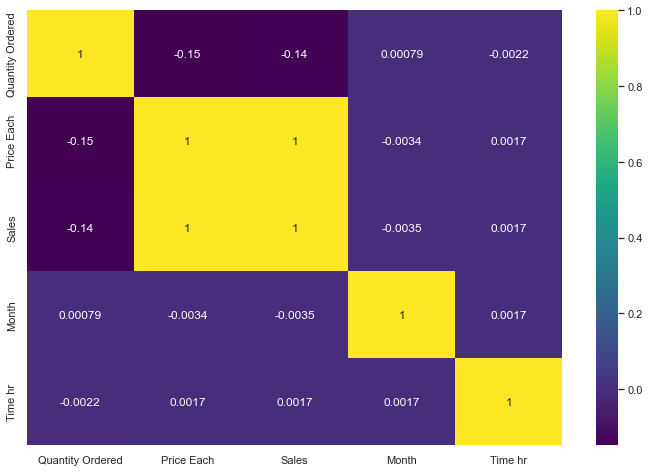

In [32]:
sns.heatmap(corr, annot = True, cmap = 'viridis')

##### >>Price and sales of the products are highly correlated

### Best month for sales

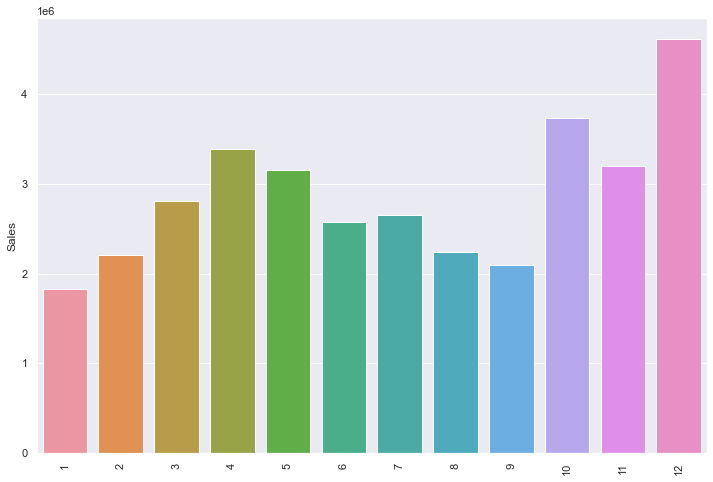

In [19]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(x = np.array(range(1,13)) , y = 'Sales' , data = all_data.groupby('Month').sum())
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [94]:
all_data.loc[all_data['Month'] == 12].groupby('Date').count().head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,Time hr,Time min,City
Date,,,,,,,,,,,
2019-12-01,782,782,782,782,782,782,782,782,782,782,782
2019-12-02,799,799,799,799,799,799,799,799,799,799,799
2019-12-03,753,753,753,753,753,753,753,753,753,753,753
2019-12-04,796,796,796,796,796,796,796,796,796,796,796
2019-12-05,802,802,802,802,802,802,802,802,802,802,802


#### December is the best month for sales , it may be due to christmas and new year offers and discount that attracted the customers

#### In the month of december, the peaks at the sales is before christmas and the last one is just before new year

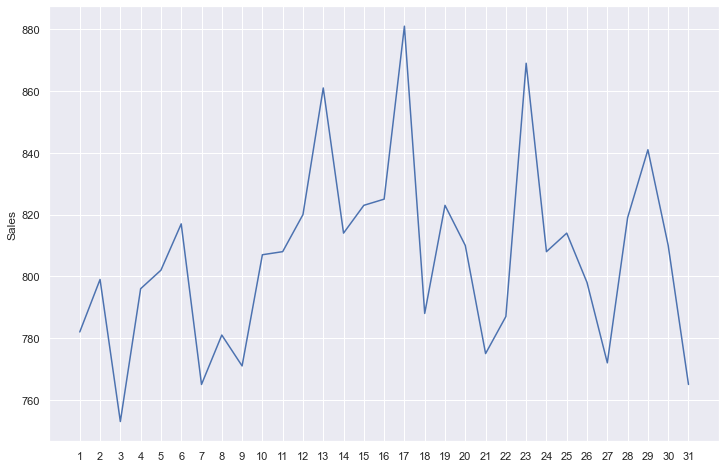

In [91]:
sns.set(rc={'figure.figsize':(12,8)})

ax = sns.lineplot(x = np.array(range(1,32)) , y = 'Sales' , 
                  data = all_data.loc[all_data['Month'] == 12].groupby('Date').count())

#plot = ax.set_xticklabels(ax.get_xticklabels())
plot = ax.set_xticks(range(1,32))

### Best cities for sales

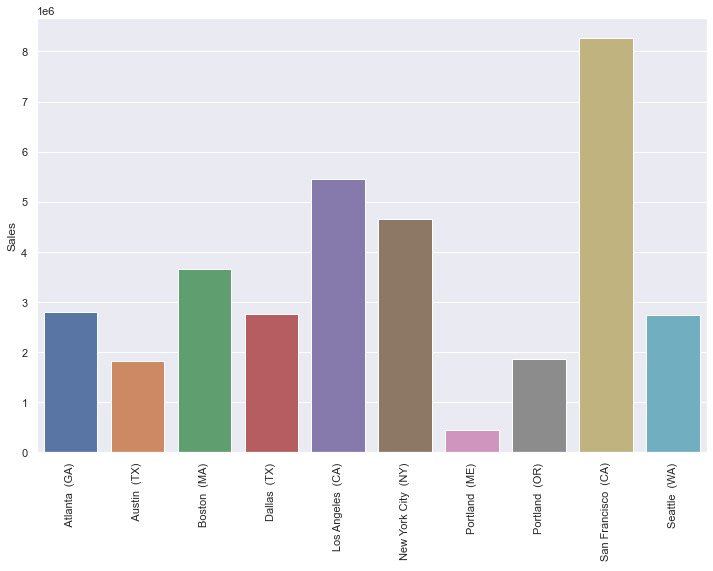

In [63]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(x = np.array([city for city, df in all_data.groupby('City')]) , 
                 y = 'Sales' , data = all_data.groupby('City').sum())
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Wordcloud for Products

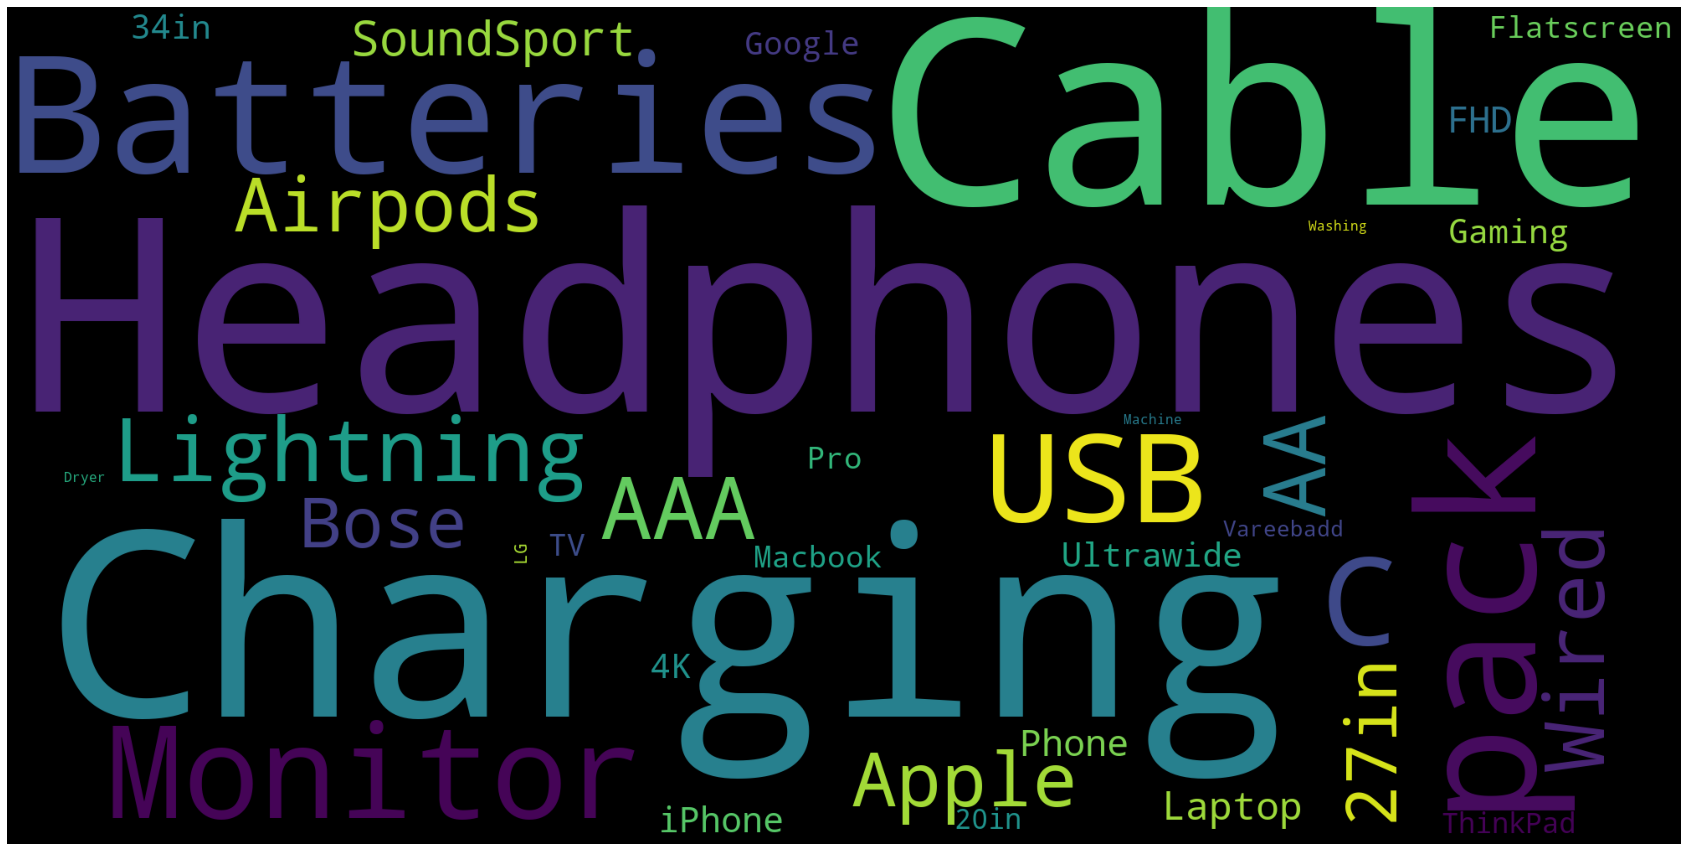

In [44]:
stop_words = set(stopwords.words('english'))
all_data['Product_no_stopwords'] = all_data['Product'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in all_data['Product_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

### What time should we display advertisements to maximize consumers likelihood to buy products

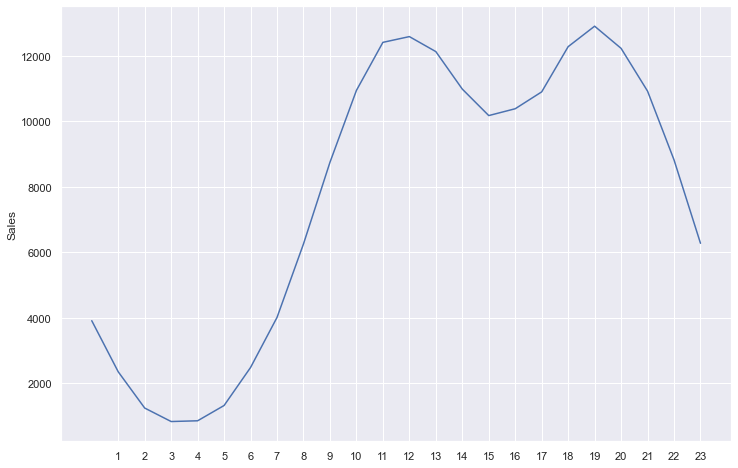

In [70]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.lineplot(x = np.array([hours for hours, df in all_data.groupby('Time hr')]) , 
                 y = 'Sales' , data = all_data.groupby('Time hr').count())
plot = ax.set_xticks(range(1,24))


### What products are often sold together (It will help us in marketing startegies of various offers)

In [86]:
#Creating a new dataframe df for duplicate order Ids
df = all_data[all_data['Order ID'].duplicated(keep=False)]

#Adding a column of all the products by duplicated order IDs

df['Ordered'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID' , 'Ordered']].drop_duplicates()
df

,Order ID,Ordered
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [87]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Ordered']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Product Sales

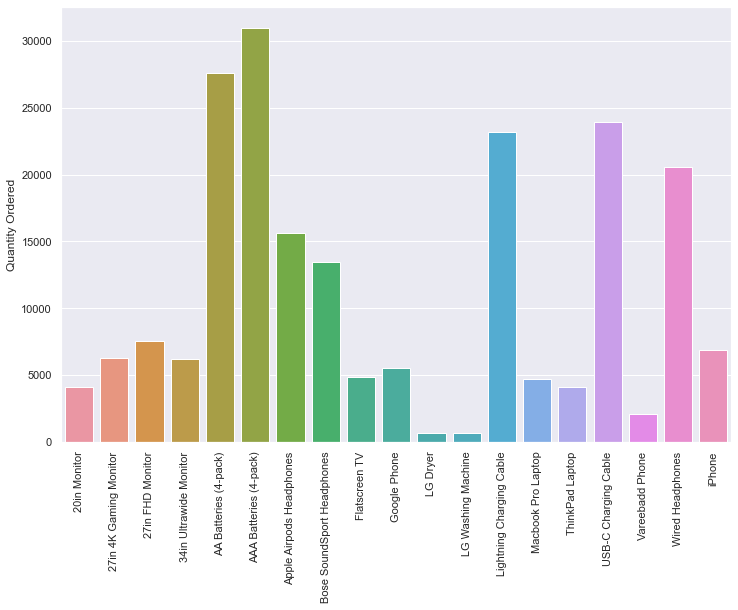

In [81]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(x = np.array([products for products, df in all_data.groupby('Product')]) , 
                 y = 'Quantity Ordered' , data = all_data.groupby('Product').sum())
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#####  >>AAA Batteries are the cheapast product. hence it is easily afforadable by every sections and group of peoples

In [89]:
all_data.sort_values('Price Each' , ascending=True)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,Date,Time hr,Time min,City
1915,195901,AAA Batteries (4-pack),1,2.99,2.99,2019-05-01 10:51:00,5,"6 2nd St, Atlanta, GA 30301",2019-05-01,10,51,Atlanta (GA)
14962,190829,AAA Batteries (4-pack),1,2.99,2.99,2019-04-15 18:36:00,4,"925 South St, San Francisco, CA 94016",2019-04-15,18,36,San Francisco (CA)
15950,294036,AAA Batteries (4-pack),1,2.99,2.99,2019-11-07 20:54:00,11,"120 8th St, Boston, MA 02215",2019-11-07,20,54,Boston (MA)
15952,294038,AAA Batteries (4-pack),1,2.99,2.99,2019-11-03 23:54:00,11,"275 Hickory St, Atlanta, GA 30301",2019-11-03,23,54,Atlanta (GA)
3175,165026,AAA Batteries (4-pack),3,2.99,8.97,2019-03-21 13:06:00,3,"629 Chestnut St, New York City, NY 10001",2019-03-21,13,6,New York City (NY)
...,...,...,...,...,...,...,...,...,...,...,...,...
57,295717,Macbook Pro Laptop,1,1700.00,1700.00,2019-12-25 09:51:00,12,"82 10th St, San Francisco, CA 94016",2019-12-25,9,51,San Francisco (CA)
126,162127,Macbook Pro Laptop,1,1700.00,1700.00,2019-03-25 13:08:00,3,"603 12th St, San Francisco, CA 94016",2019-03-25,13,8,San Francisco (CA)
52,295712,Macbook Pro Laptop,1,1700.00,1700.00,2019-12-10 20:02:00,12,"331 Madison St, New York City, NY 10001",2019-12-10,20,2,New York City (NY)
12445,173889,Macbook Pro Laptop,1,1700.00,1700.00,2019-03-06 12:00:00,3,"167 North St, San Francisco, CA 94016",2019-03-06,12,0,San Francisco (CA)


### Here we see the relation , Price and Quantity ordered are Inversely proportional that validate our hypothesis

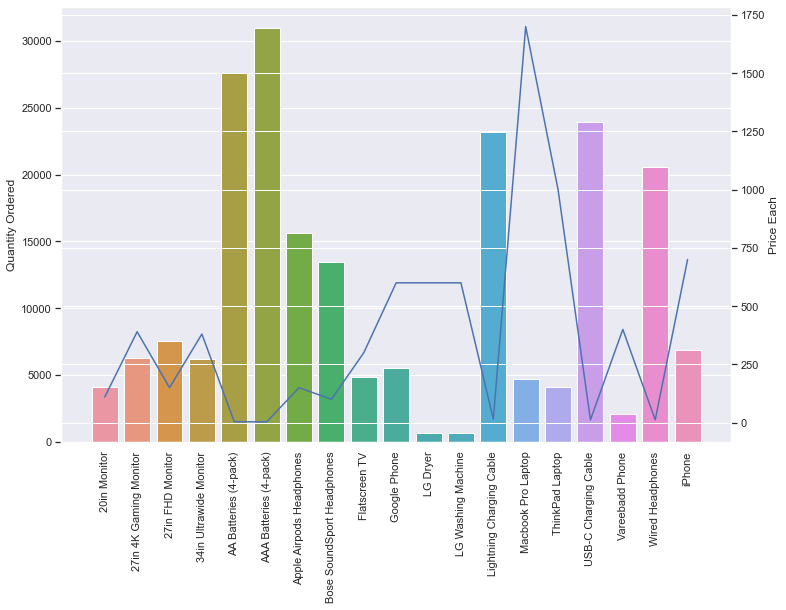

In [90]:
sns.set(rc={'figure.figsize':(12,8)})
ax1 =sns.barplot(x = np.array([products for products, df in all_data.groupby('Product')]) , 
                 y = 'Quantity Ordered' , data = all_data.groupby('Product').sum())
ax2 = plt.twinx()
sns.lineplot(x = np.array([products for products, df in all_data.groupby('Product')]) , 
                 y = 'Price Each' , data =all_data.groupby('Product').mean(), color="b", ax=ax2)

plot = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)